In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
F = [[  3.87485647e-07,   1.57087772e-05,  -2.76397227e-03],[  2.25620018e-05,  -9.24423768e-06,  -3.71854594e-02],[ -3.66738956e-03,   3.22723564e-02,   9.98776575e-01]]
Matr = F
normal = np.max(Matr)
MatrixL = np.array(Matr)/normal
MatrixR = MatrixL.transpose()
ipL = [296.0, 185.0,1]
ipR = [99.0, 186.0,1]
Linex = np.arange(0,384,1)
frameIndex = 60

In [2]:
###################################
#Locate Features; single frame test
###################################
print(np.max(FrameL[frameIndex]))
fL = tp.locate(FrameL[frameIndex], 3, minmass=10) 
fL.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,224.116279,1.939535,83.662908,0.849076,0.135484,23.347788,255.0,0.000184,60
1,219.901316,5.013158,118.295461,0.858395,0.366071,31.130384,307.0,0.000153,60
2,209.160714,7.984375,87.165077,0.846474,0.454829,24.709743,219.0,0.000214,60
3,219.046843,10.171079,95.531367,0.835808,0.486880,28.795606,281.0,0.000167,60
4,211.151832,13.997382,74.323793,0.836034,0.374532,22.374964,226.0,0.000208,60


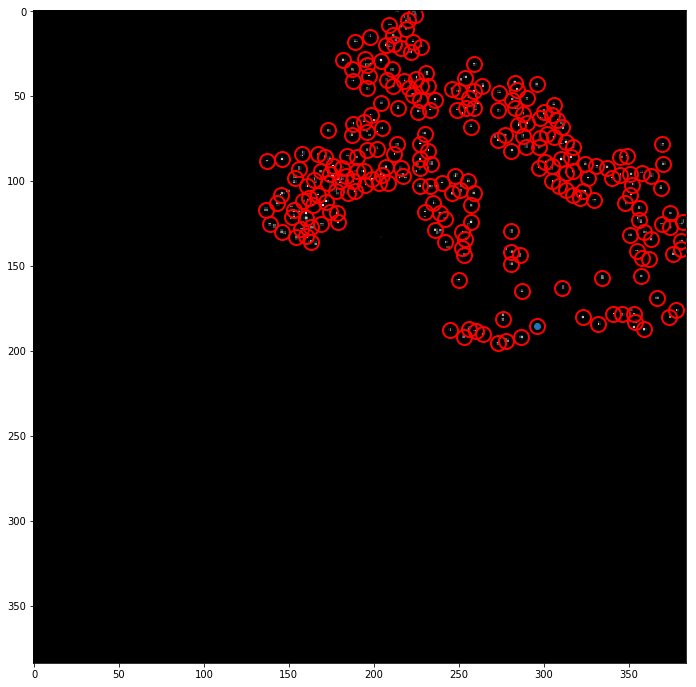

(232, 0.0050637232589913293)


In [3]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(ipL[0], ipL[1],'o')
tp.annotate(fL, FrameL[frameIndex]);
Min = 100000
indexL = 0
for ii in range(len(fL)):
    x = fL['x'].iloc[ii]
    y = fL['y'].iloc[ii]
    mi = (x-ipL[0])**2+(y-ipL[1])**2
    if(mi<Min):
        Min = mi
        indexL = ii
print(indexL,Min)

In [4]:
print(np.max(FrameR[frameIndex]))
fR = tp.locate(FrameR[frameIndex], 3, minmass=10) 
fR.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,192.030702,0.828947,73.728927,0.827170,0.346154,23.282819,261.0,0.000196,60
1,200.015015,1.012012,107.683038,0.832883,0.454545,32.983994,273.0,0.000188,60
2,221.994751,1.013123,123.204918,0.833989,0.433962,37.511209,324.0,0.000158,60
3,191.000000,6.924471,107.036293,0.839004,0.399142,31.690504,263.0,0.000195,60
4,196.835125,7.967742,90.220924,0.844548,0.467337,25.869799,231.0,0.000222,60


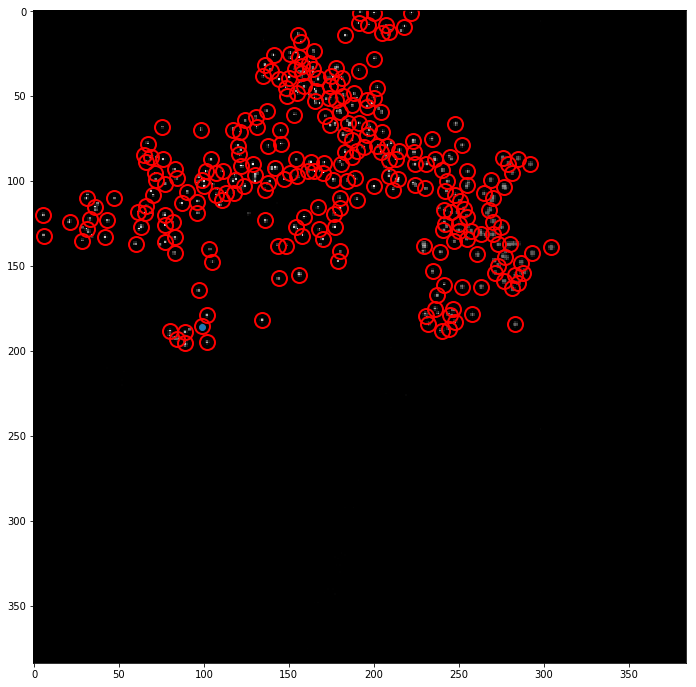

(251, 0.76651922396121375)


In [5]:
plt.figure(figsize = (12,12))  # make a new figure
plt.plot(ipR[0], ipR[1],'o')
tp.annotate(fR, FrameR[frameIndex]);
Min = 100000
indexR = 0
for ii in range(len(fR)):
    x = fR['x'].iloc[ii]
    y = fR['y'].iloc[ii]
    mi = (x-ipR[0])**2+(y-ipR[1])**2
    if(mi<Min):
        Min = mi
        indexR = ii
print(indexR,Min)

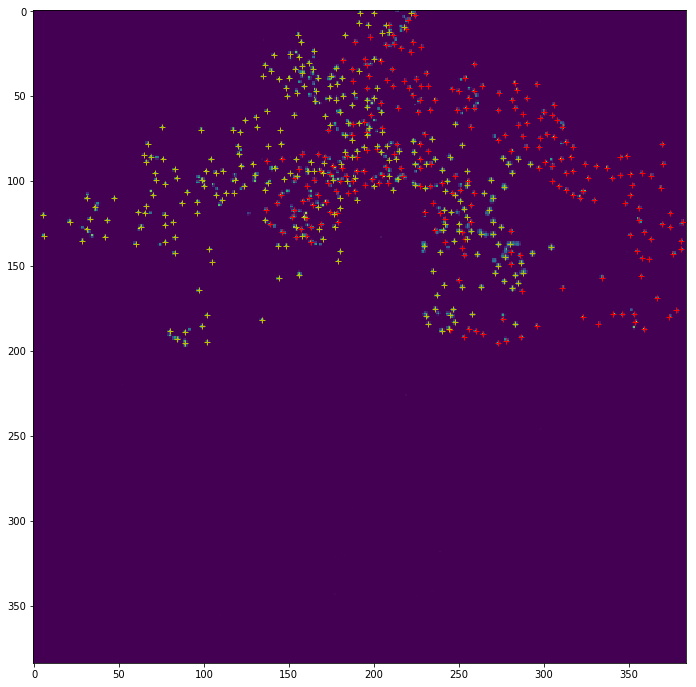

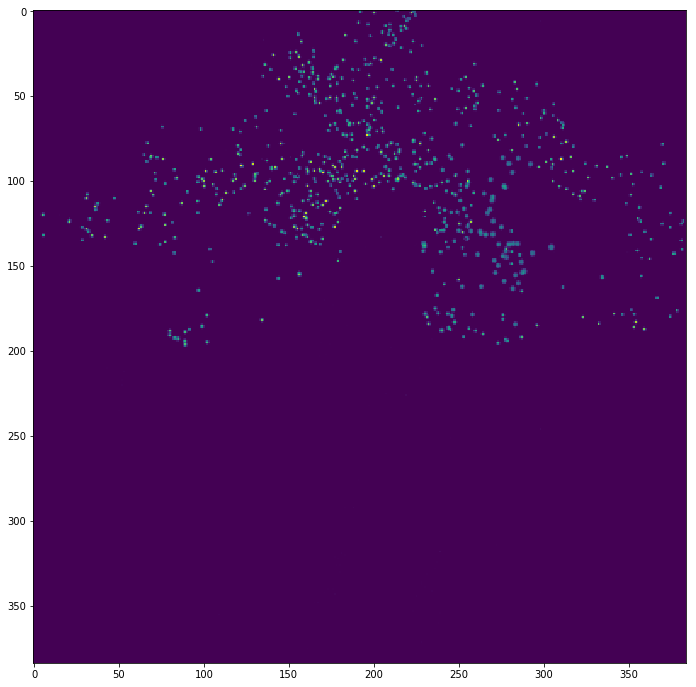

(259, 242)


In [6]:
plt.figure(figsize = (12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.plot(fL['x'],fL['y'],'+',color='r')
plt.plot(fR['x'],fR['y'],'+',color='y')
plt.show()
plt.figure(figsize = (12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.show()
print(len(fR),len(fL))

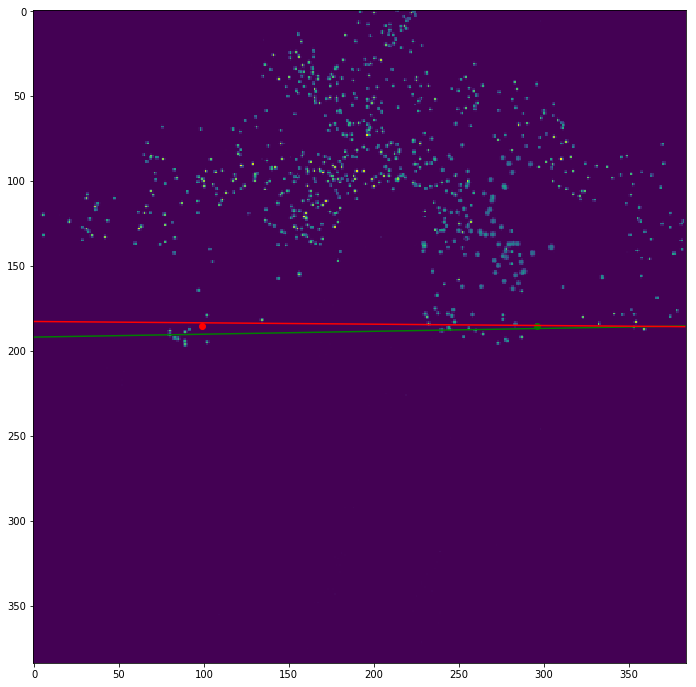

(232, 251, (295.95118343195264, 184.94822485207101, 1), (98.944773175542409, 185.12623274161734, 1), 1.772302067872089, 1.7668588638582639)


In [7]:
ipL = (fL['x'].iloc[indexL],fL['y'].iloc[indexL],1)
ipR = (fR['x'].iloc[indexR],fR['y'].iloc[indexR],1)

LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
LineR = np.dot(ipL,MatrixR) #points in the right frame and the corresponding epipolar lines in the left frame
dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
plt.figure(figsize=(12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.plot(ipL[0],ipL[1],'o',color='g')
plt.plot(Linex,LineyL,color='g')
plt.plot(ipR[0],ipR[1],'o',color='r')
plt.plot(Linex,LineyR,color='r')
plt.show()
print(indexL,indexR,ipL,ipR,dlr,drl)

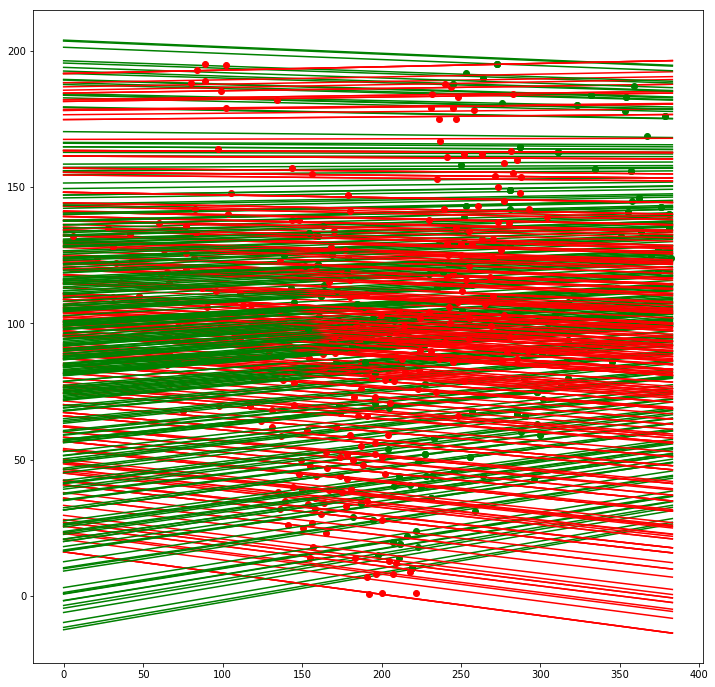

In [8]:
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for ir in range(0,len(fR)):
#for ir in range(2,3):
    Min = 10000
    MinIndex = 0
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixL)
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for il in range(0,len(fL)):
        xL = fL['x'].iloc[il]
        yL = fL['y'].iloc[il]
        ipL_i = [xL,yL,1]
        LineR = np.dot(ipL_i,MatrixR) 
        #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
        #plt.plot(xL,yL,'o',color='g')
        #plt.plot(Linex,LineyL,color='g')
        #plt.plot(xR,yR,'o',color='r')
        #plt.plot(Linex,LineyR,color='r')
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        #plt.plot(xL,yL,'o',color='g')
        #print(ir,xR,yR,il,xL,yL,dlr,drl)        
        if(FF<Min):
            Min = FF
            MinIndex = il
    xL = fL['x'].iloc[MinIndex]
    yL = fL['y'].iloc[MinIndex] 
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1] 
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
plt.show()


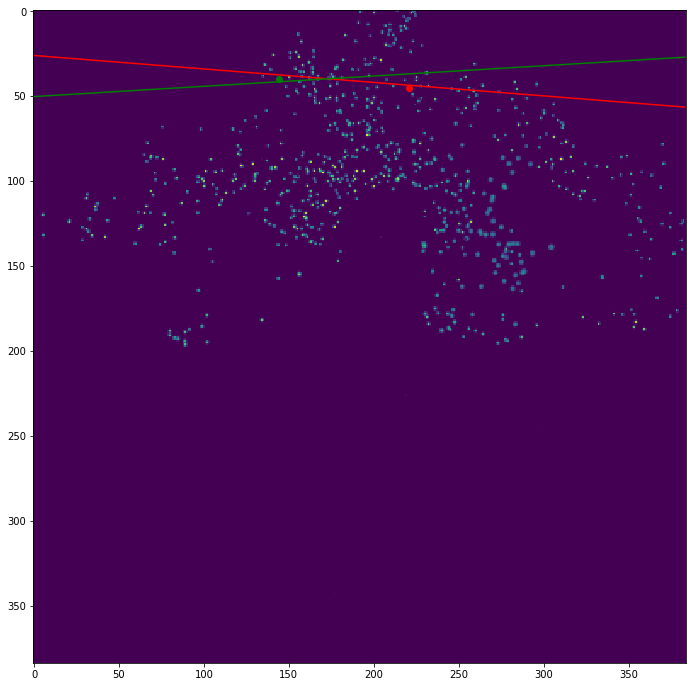

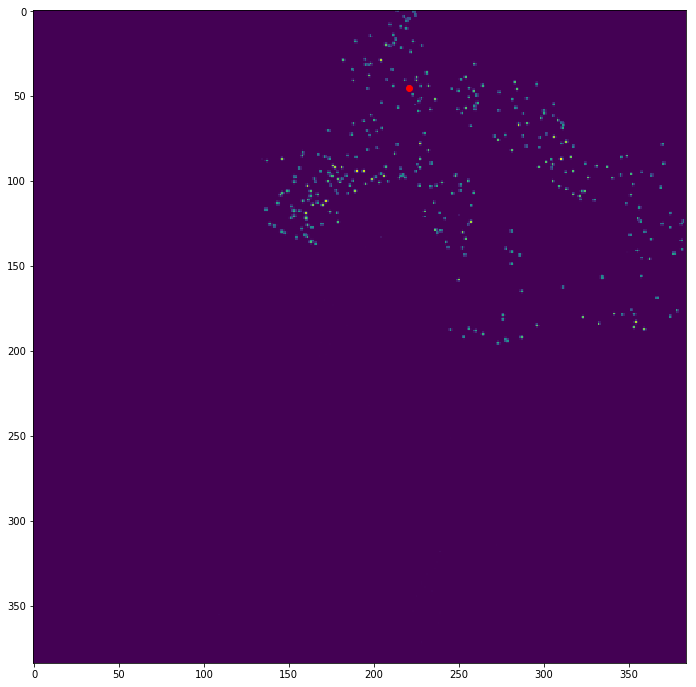

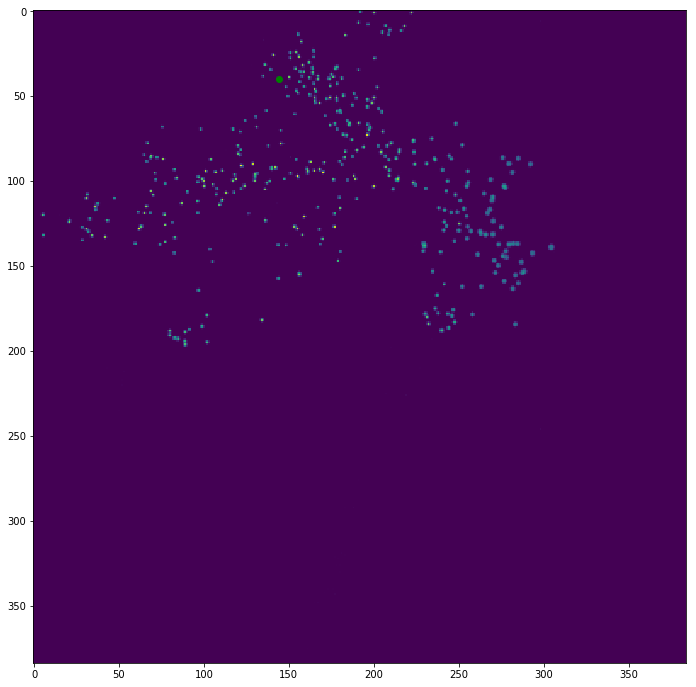

In [9]:
iR=31
iL=34
plt.figure(figsize = (12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
#plt.plot(fL['x'],fL['y'],'+')
#plt.plot(fR['x'],fR['y'],'+')
#plt.plot(ipL[0], ipL[1],'+')
#plt.plot(ipR[0], ipR[1],'+')
plt.plot(fR['x'].iloc[iR], fR['y'].iloc[iR],'o',color='g')
ipR = [fR['x'].iloc[iR], fR['y'].iloc[iR],1]
LineL = np.dot(ipR,MatrixL)
LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
plt.plot(fL['x'].iloc[iL], fL['y'].iloc[iL],'o',color='r')
ipL = [fL['x'].iloc[iL], fL['y'].iloc[iL],1]
LineR = np.dot(ipL,MatrixR)
LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
plt.plot(Linex,LineyL,color='r')
plt.plot(Linex,LineyR,color='g')
plt.show()
plt.figure(figsize = (12,12))
plt.imshow(FrameL[frameIndex])
plt.plot(fL['x'].iloc[iL], fL['y'].iloc[iL],'o',color='r')
plt.show()
plt.figure(figsize = (12,12))
plt.imshow(FrameR[frameIndex])
plt.plot(fR['x'].iloc[iR], fR['y'].iloc[iR],'o',color='g')
plt.show()